# Práctica Final Aprendizaje Automático

Grupo 5: Jorge Ortega y Daniela Vidal

## Índice

1. [Presentación del dataset](#Presentación-del-dataset)
2. [Preprocesamiento](#Preprocesamiento)
3. [Dataset final](#Dataset-final)
4. [Separación en entrenamiento, validación y test](#Separación-en-entrenamiento,-validación-y-test)
5. [Regresión logística](#Reg-logística)
6. [Red neuronal](#Red-neuronal)
7. [Árboles de decisión](#Árboles-de-decisión)
8. [Comparación de resultados](#Comparación-de-resultados)
9. [Conclusiones](#Conclusiones)
10. [Bibliografía](#Bibliografía) 

## 1. Presentación del dataset <a class="anchor" id="Presentación-del-dataset"></a>

Esta práctica consiste en la aplicación de los conocimientos adquiridos en la asignatura de Aprendizaje Automático a un dataset sobre reconocimiento de gestos con datos de la actividad muscular. Lo que se pretende es realizar un clasificador que sea capaz de predecir qué gesto se está realizando a partir de los datos de la actividad muscular.

El dataset que hemos elegido para realizar la práctica es el de [Classify gestures by reading muscle activity](https://www.kaggle.com/datasets/kyr7plus/emg-4). Se trata de un dataset de Kaggle que contiene datos de la actividad muscular de 4 gestos diferentes: 
- Piedra (puño)

- Papel (extensión de la mano)

- Tijeras (dedos índice y corazón extendidos)

- Okay (dedo índice tocando el pulgar y el resto de dedos extendidos). 

Los datos se han recogido con señales EMG (electromiografía). Las señales EMG son señales eléctricas que se producen en los músculos cuando estos se activan y se pueden utilizar para detectar y clasificar gestos. Los datos se han recogido con una banda colocada en el brazo con 8 sensores en la superficie de la piel, cada uno de ellos recoge la actividad eléctrica producida por los músculos debajo de la piel. 
Cada línea del dataset consiste en 40ms en las que se hacen 8 medidas consecutivas de los 8 sensores, es decir, 64 columnas en total de esta manera:

                                    [8 sensores][8 sensores][8 sensores][8 sensores][8 sensores][8 sensores][8 sensores][8 sensores][Gesto]

En total hay 120s de cada gesto.

La columna 'Gesto' clasifica piedra - 0, tijeras - 1, papel - 2, okay - 3.

Para asegurarse de la calidad de los datos, se realizaron 6 repeticiones de cada gesto en la que se empezaba y se paraba de medir con el gesto sostenido.

Se trata de 4 datasets de alrededor de 2900 filas cada uno con la actividad de cada gesto. 

Sin embargo hemos decidido usar solo 3 de los 4 datasets, ya que la dimensionalidad de los datos es muy grande y para algunos algoritmos de aprendizaje automático se hace muy tedioso. Por ello hemos decidido usar solo los datos de los gestos de piedra, papel y tijeras.

## 2. Preprocesamiento <a class="anchor" id="Preprocesamiento"></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import Sequential, Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import seaborn as sns

2023-05-07 22:40:15.724850: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-07 22:40:16.563141: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-07 22:40:16.563160: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-05-07 22:40:19.709671: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

### Constantes globales

In [3]:
RANDOM_STATE = 42

### Lectura del dataset

In [4]:
X0 = pd.read_csv('0.csv')
X1 = pd.read_csv('1.csv')
X2 = pd.read_csv('2.csv')
X3 = pd.read_csv('3.csv')

Podemos ver lo que contienen los datasets en las siguientes tablas:

In [5]:
X0.head()

,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,...,-28.0,61.0,4.0.3,8.0.1,5.0.1,4.0.4,-7.0.1,-59.0,16.0,0
0,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
1,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
2,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
3,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0
4,15.0,-5.0,-5.0,-15.0,12.0,-22.0,-38.0,36.0,9.0,6.0,...,-26.0,5.0,6.0,6.0,11.0,5.0,30.0,-48.0,25.0,0


In [6]:
X1.head()

,-7.0,-1.0,-1.0.1,0.0,-10.0,-10.0.1,-1.0.2,1.0,-5.0,-5.0.1,...,6.0.1,-4.0.6,-3.0.5,-5.0.5,-3.0.6,15.0.1,11.0,-4.0.7,-5.0.6,1
0,-6.0,-2.0,-5.0,-2.0,27.0,42.0,3.0,5.0,11.0,1.0,...,2.0,-17.0,-5.0,-7.0,-2.0,15.0,12.0,0.0,-7.0,1
1,5.0,0.0,-1.0,-2.0,2.0,-9.0,1.0,5.0,1.0,-3.0,...,-11.0,-23.0,1.0,-1.0,-1.0,-23.0,-25.0,2.0,-1.0,1
2,31.0,4.0,2.0,-2.0,38.0,14.0,2.0,7.0,-2.0,4.0,...,-4.0,13.0,2.0,-1.0,-3.0,-7.0,0.0,-3.0,-2.0,1
3,-4.0,-4.0,3.0,3.0,-25.0,-46.0,-1.0,3.0,-7.0,-6.0,...,15.0,4.0,-4.0,-1.0,-1.0,7.0,26.0,3.0,-7.0,1
4,-8.0,-3.0,-1.0,0.0,14.0,5.0,-4.0,-6.0,2.0,0.0,...,-18.0,53.0,8.0,-1.0,-1.0,-2.0,-5.0,-2.0,9.0,1


In [7]:
X2.head()

,4.0,19.0,-9.0,-7.0,-3.0,-36.0,-6.0,-23.0,3.0,-21.0,...,9.0,-14.0.1,-2.0.5,-3.0.3,-4.0,-21.0.1,7.0,-8.0.1,-12.0.2,2
0,-1.0,12.0,20.0,7.0,20.0,-73.0,-4.0,-2.0,4.0,5.0,...,-3.0,-5.0,-2.0,0.0,-4.0,-7.0,5.0,6.0,9.0,2
1,4.0,5.0,-8.0,-2.0,10.0,-10.0,-10.0,16.0,-3.0,-18.0,...,2.0,0.0,2.0,3.0,-8.0,19.0,20.0,0.0,-8.0,2
2,-3.0,-3.0,5.0,11.0,25.0,-20.0,-2.0,14.0,9.0,32.0,...,15.0,-2.0,16.0,6.0,9.0,1.0,31.0,16.0,4.0,2
3,-5.0,-9.0,-2.0,-5.0,-46.0,-34.0,-9.0,-4.0,0.0,8.0,...,-5.0,-11.0,-6.0,7.0,6.0,-10.0,-24.0,-6.0,0.0,2
4,3.0,-3.0,-6.0,-5.0,-3.0,-4.0,-5.0,-4.0,-5.0,8.0,...,-18.0,-14.0,8.0,1.0,-2.0,-4.0,-34.0,-3.0,6.0,2


In [8]:
X3.head()

,-22.0,-9.0,-6.0,-1.0,21.0,26.0,-2.0,5.0,5.0.1,0.0,...,-10.0,-15.0.1,-6.0.3,-3.0.4,3.0.1,20.0,25.0,1.0.5,1.0.6,3
0,-7.0,0.0,1.0,0.0,-13.0,-18.0,0.0,-9.0,-6.0,-2.0,...,-1.0,11.0,-4.0,-5.0,-4.0,3.0,-8.0,-7.0,-3.0,3
1,-6.0,-6.0,-6.0,-8.0,25.0,43.0,-4.0,7.0,6.0,1.0,...,3.0,2.0,1.0,3.0,-1.0,1.0,9.0,4.0,4.0,3
2,2.0,1.0,1.0,1.0,0.0,-23.0,2.0,-6.0,-1.0,-2.0,...,16.0,-3.0,-1.0,-1.0,-3.0,0.0,-3.0,4.0,3.0,3
3,0.0,3.0,4.0,5.0,1.0,25.0,-9.0,0.0,0.0,1.0,...,1.0,6.0,2.0,1.0,-3.0,-20.0,-42.0,-4.0,2.0,3
4,-11.0,-2.0,-5.0,1.0,-7.0,-11.0,-4.0,-23.0,-9.0,0.0,...,-4.0,9.0,1.0,2.0,8.0,21.0,41.0,15.0,9.0,3


Como habíamos comentado, cada dataset tiene 2900 filas, 8 columnas de sensores y una columna de gesto. En este caso, los gestos están codificados como 0, 1 y 2 para piedra, tijeras y papel respectivamente. En el resto de columnas podemos ver datos numéricos que representan la actividad muscular en cada sensor.

In [9]:
print(X0.shape, X1.shape, X2.shape, X3.shape)

(2909, 65) (2902, 65) (2942, 65) (2921, 65)


Como podemos hay más o menos el mismo número de gestos de cada tipo y el mismo número de medidas. Igualmente nos encargaremos del desbalanceo de clases para obtener mejores resultados.

A continuación vamos a comprobar si para cada archivo está correctamente clasificada su clase:

In [10]:
X0.iloc[:,-1].value_counts(), X1.iloc[:,-1].value_counts(), X2.iloc[:,-1].value_counts(), X3.iloc[:,-1].value_counts()

(0    2909
 Name: 0, dtype: int64,
 1    2902
 Name: 1, dtype: int64,
 2    2942
 Name: 2, dtype: int64,
 3    2921
 Name: 3, dtype: int64)

Comprobaremos también que no hay valores nulos en los datasets:

In [11]:
X0.isna().sum().sum(), X1.isna().sum().sum(), X2.isna().sum().sum(), X3.isna().sum().sum()

(0, 0, 0, 0)

Ahora que hemos comprobado que los datos están bien clasificados y no hay valores nulos, vamos a unir los 4 datasets en uno solo para poder trabajar con todos los datos a la vez:

In [12]:
allFiles=['0.csv','1.csv','2.csv', '3.csv']

list = []
for file in allFiles:
    read = pd.read_csv(file, header = None)
    list.append(read)
data = pd.concat(list)


In [13]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,...,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0


Por otro lado podemos ver como los rangos de los datos son relativamente diferentes, por lo que tendremos que escalarlos para que no haya problemas a la hora de entrenar los modelos.

In [14]:
def scale(X):
    x = X.iloc[:, :-1].values
    s = StandardScaler()
    x_scaled = s.fit_transform(x)
    df_scaled = pd.DataFrame(x_scaled, columns=X.columns[:-1]) #La columna de la clase no se escala
    df_scaled[X.columns[-1]] = X[X.columns[-1]].values
    return df_scaled

In [15]:
X_scal = scale(data)

## 3. Dataset final <a class="anchor" id="Dataset-final"></a>

El dataset final que vamos a utilizar para entrenar los modelos es el siguiente:

In [16]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,...,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0


In [17]:
data.shape

(11678, 65)

Es decir 11678 filas y 65 columnas.

In [18]:
data.iloc[:,-1].value_counts()

2    2943
3    2922
0    2910
1    2903
Name: 64, dtype: int64

## 4. Separación en entrenamiento, validación y test <a class="anchor" id="Separación-en-entrenamiento,-validación-y-test"></a>

Deberemos dividir de manera distinta para los modelos de clasificación y los de regresión. Para los modelos de clasificación, dividiremos en entrenamiento, validación y test, mientras que para los de regresión, dividiremos en entrenamiento y test. Además para el de regresión usaremos dos el dataset de piedra y el de tijeras de manera que haya dos posibles salidas y podamos aplicar la función sigmoide para calcular la probabilidad de que sea una u otra, mientras que para el de clasificación usaremos todos los gestos.

#### Regresión

Primero sacaremos los datos de piedra y tijeras para el modelo de regresión:

In [19]:
allFiles=['0.csv','1.csv']

list = []
for file in allFiles:
    read = pd.read_csv(file, header = None)
    list.append(read)
data_reg = pd.concat(list)

Los normalizamos:

In [20]:
X_reg_scal = scale(data_reg)

In [21]:
X_R = X_reg_scal.iloc[:, :-1].values
y_R = X_reg_scal.iloc[:, -1].values

Y los dividimos en entrenamiento y test (70-30):

In [22]:
X_trainR, X_testR, y_trainR, y_testR = train_test_split(X_R, y_R, test_size=0.30, random_state=RANDOM_STATE, stratify=y_R)

In [23]:
X_trainR.shape, X_testR.shape

((4069, 64), (1744, 64))

#### Clasificación

Dividiremos en 60-20-20 para entrenamiento, test y validación. Aunque las clases están balanceadas, utilizaremos la función de sklearn para asegurarnos de que se mantienen las proporciones de cada clase en cada conjunto.

In [24]:
X_train, X, y_train, y = train_test_split(X_scal.iloc[:, :-1], X_scal.iloc[:, -1],test_size=0.4, random_state=RANDOM_STATE, stratify=X_scal.iloc[:, -1])
X_val, X_test, y_val, y_test = train_test_split(X, y, test_size=0.5, random_state=RANDOM_STATE, stratify=y)

In [25]:
X_train.shape, X_val.shape, X_test.shape

((7006, 64), (2336, 64), (2336, 64))

# 5. Regresión logística <a class="anchor" id="Reg-logística"></a>

Primero estudiaremos los datos para ver cómo de fuerte es la correlación entre las variables, esto es la relación lineal existente entre ellas, y si hay alguna que no aporta información. 

Para ello usaremos la matriz de correlación ya que son demasiados valores para verlos en una tabla:

<Axes: >

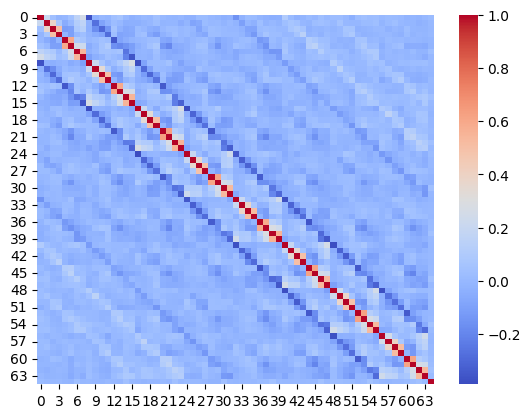

In [26]:
corr_matrix = X_reg_scal.corr()
corr_matrix.to_csv('corr_matrix.csv', index=False)
sns.heatmap(corr_matrix, cmap='coolwarm')

Podemos observar aquí que el único caso en el que tenemos un color rojo (1.0 en correlación) es en la diagonal lo cual es evidente ya que una variable está correlacionada consigo misma. Esto nos indica que no hay variables que estén linealmente relacionadas entre sí y que todas aportan información. La máxima correlación que tenemos es de 0.6 en menos de 10 variables (lo que se puede ver de color más clarito, esto se puede comprobar em corr_matrix.csv) pero en general se pueden ver colores más oscuros, lo cual indica que la correlación es baja. Esto nos indica que no es una relación lineal fuerte y por tanto puede ser no lineal así que mapearemos los datos a un espacio de mayor dimensión para ver si podemos separarlos linealmente.

#### Constantes:

In [27]:
iteraciones = 20
degree = 2

#### Funciones necesarias para la regresión logística:

Mapeo de los atributos:
Hemos visto que las variables no presentan una correlación muy fuerte entre ellas, no obstante puede ser que presenten una relación no lineal entre ellas. Por ello, vamos a mapear los atributos a un espacio de mayor dimensión para ver si así se puede obtener un mejor resultado. Usaremos la función PolynomialFeatures de sklearn.

In [28]:
def map_features(X, degree):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X)
    return X_poly

1. Cálculo de la función de coste y su gradiente

Definición de la función sigmoide a la que se le pasa el vector w, el valor de b y el vector x y se hace el producto escalar para calcular z.

In [29]:
def func_sigmoide(x, w, b):
    z = np.dot(x,w)+b
    return 1/(1+np.exp(-z))

Función que devuelve la predicción según el modelo entrenado.

In [30]:
def predict(X, w, b, degree):
    XX = map_features(X, degree)
    y_hat= func_sigmoide(XX, w, b)
    y_hat = np.where(y_hat >= 0.5, 1, 0)
    return y_hat

Función de coste regularizada: (siendo θ nuestro w,b)

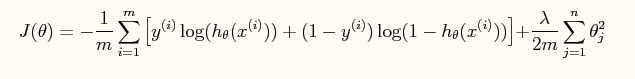

*Figura 1: Función de coste regularizada*

In [31]:
def func_coste(X, Y, w, b, L):
    m = len(Y)
    f = func_sigmoide(X, w, b)
    coste = (-1/m)*np.sum(Y*np.log(f)+(1-Y)*np.log(1-f))
    coste += (L/(2*m))*np.sum(w**2)
    return coste

La función del cálculo de gradiente con regularización es:

Para w:

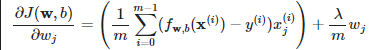

Para b:

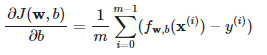

*Figuras 2 y 3: Gradiente de la función de coste regularizada*


In [32]:
def funcion_grad(X, y, w, b, L):
    m = X.shape[0] #antes len(y)
    gw = np.zeros(w.shape)
    gb = 0
    y_hat = func_sigmoide(X, w, b)
    dif = y_hat-y
    
    gb = np.sum(dif)/m                                    
    gw = (1/m) * np.dot(dif,X) + L*w/m
    
    return gw, gb

In [33]:
def funcion_grad_desc(X, y, w, b, alpha, num_iter, L):   
    for i in range(num_iter):
        gw, gb = funcion_grad(X, y, w, b, L)
        w = w - alpha*gw
        b = b - alpha*gb
    return w, b

## Adaptación

Vamos a adaptar nuestros datos ya que, como ya ha sido mencionado, no son linealmente separables. Para ello vamos a usar la función PolynomialFeatures de sklearn que nos permite mapear los atributos a un espacio de mayor dimensión. En este caso, vamos a probar a mapearlos con grado 2. Elegimos este grado ya que si lo ponemos más alto, el tiempo de ejecución se dispara y el gasto en memoria es enorme y no obtenemos mejores resultados. (Si lo hacemos de grado 3 en vez de 2144 columnas tenemos 278401)

In [34]:
XX_train = map_features(X_trainR, degree)
XX_train.shape

(4069, 2144)

## Ajuste

Haremos una regresión logística con regularización, para ello probaremos con diferentes valores de lambda y veremos cuál es el que mejor resultado nos da. 
Los valores que vamos a probar son:

Lambda: 0.1, 1, 2, 4, 6, 8, 10

Alpha: 0.001, 0.01, 0.1

Por último las iteraciones las establecemos en 100, ya que con más iteraciones el tiempo de ejecución se dispara además de que se produce sobreajuste.

In [35]:
def regresion_logistica(X, y, alpha, num_iter, L):
    w, b = funcion_grad_desc(X, y, np.zeros(X.shape[1]), 0, alpha, num_iter, L)
    return w, b

In [36]:
Ls = [0.001, 0.1, 1, 10, 50, 100]
alphas = [0.1, 0.01, 0.001]

train_acc = []
test_acc = []
for l in Ls:
    print ("Lambda: ", l)
    train_list = []
    test_list = []
    for a in alphas:
        w, b = regresion_logistica(XX_train, y_trainR, a, iteraciones, l)
        
        y_hat_train = predict(X_trainR, w, b, degree)
        train = np.mean(y_hat_train == y_trainR)*100
        
        y_hat = predict(X_testR, w, b, degree)
        test = np.mean(y_hat == y_testR)*100
        
        print ("    Alpha: ", a, "Train: ", train, "Test: ", test)
        train_list.append(train)
        test_list.append(test)
    
    train_acc.append(train_list)
    test_acc.append(test_list)  

Lambda:  0.001
    Alpha:  0.1 Train:  99.65593511919391 Test:  99.2545871559633
    Alpha:  0.01 Train:  98.84492504300812 Test:  98.5091743119266
    Alpha:  0.001 Train:  91.79159498648316 Test:  91.05504587155964
Lambda:  0.1
    Alpha:  0.1 Train:  99.65593511919391 Test:  99.2545871559633
    Alpha:  0.01 Train:  98.84492504300812 Test:  98.5091743119266
    Alpha:  0.001 Train:  91.79159498648316 Test:  91.05504587155964
Lambda:  1
    Alpha:  0.1 Train:  99.65593511919391 Test:  99.2545871559633
    Alpha:  0.01 Train:  98.84492504300812 Test:  98.5091743119266
    Alpha:  0.001 Train:  91.79159498648316 Test:  91.05504587155964
Lambda:  10
    Alpha:  0.1 Train:  99.65593511919391 Test:  99.2545871559633
    Alpha:  0.01 Train:  98.84492504300812 Test:  98.5091743119266
    Alpha:  0.001 Train:  91.79159498648316 Test:  91.05504587155964
Lambda:  50
    Alpha:  0.1 Train:  99.65593511919391 Test:  99.31192660550458
    Alpha:  0.01 Train:  98.84492504300812 Test:  98.509174311

Podemos ver que la regularización apenas tiene efecto en el modelo, esto se puede deber a que el modelo obtiene un buen resultado tanto en entrenamiento como en test y no necesita una medida extra para evitar el sobreajuste. No obstante, podemos ver que entre alpha=0.1 y alpha=0.01 hay una diferencia mínima en las precisiones de entrenamiento y test, por lo que elegiremos alpha=0.1 ya que es el que mejor resultado nos da.

Por otro lado podemos ver que el modelo se ajusta muy bien a los datos de entrenamiento y test, aunque la precisión de test es ligeramente menor que la de entrenamiento, que es normal. Por tanto, podemos decir que el modelo no sufre de sobreajuste.

Podemos comparar estos resultados con los obtenidos con el método de sklearn:

In [37]:
regresion = LogisticRegression(penalty='l1', solver='liblinear')

regresion.fit(XX_train, y_trainR)

y_pred = regresion.predict(map_features(X_testR, degree))

accuracy = regresion.score(map_features(X_testR, degree), y_testR)
print("Precisión: ", accuracy)


Precisión:  0.9936926605504587


En este caso hemos hecho un modelo con regularización L1 a través del parámetro penalty = 'l1', a diferencia de la regulrización que estabamos usando antes esta regularización fuerza a que algunos atributos sean 0 y por tanto no se tengan en cuenta. En este caso, podemos ver que el modelo obtiene un resultado muy similar al nuestro. En ambos casos el modelo no sufre de sobreajuste y obtiene un resultado muy bueno tanto en entrenamiento como en test.

4. Pintamos la curva de aprendizaje según los distintos valores de lambda con sus valores de alpha:

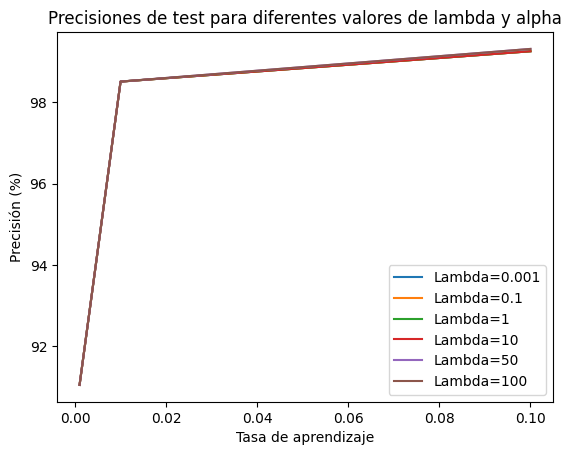

In [38]:
for i in range(len(Ls)):
    plt.plot(alphas, test_acc[i], label='Lambda='+str(Ls[i]))

plt.xlabel('Tasa de aprendizaje')
plt.ylabel('Precisión (%)')
plt.title('Precisiones de test para diferentes valores de lambda y alpha')
plt.legend()
plt.show()


Analizando los resultados, podemos observar que para todos los valores de lambda y alpha, el modelo presenta un alto rendimiento con los datos de entrenamiento, con una precisión cercana al 100%. Además, en el conjunto de prueba, los resultados apenas difieren y en general, la precisión es practicamente igual que en el conjunto de entrenamiento.

Por otro lado, al variar el valor de lambda no se aprecia una mejora en el rendimiento del modelo, lo cual sugiere que la regularización no es necesaria para nuestros datos. En cuanto a la tasa de aprendizaje, se puede observar que el mejor rendimiento se obtiene con un valor de alpha de 0.1, aunque la diferencia en la precisión entre los diferentes valores de alpha es muy pequeña.

En general, estos resultados sugieren que el modelo de regresión logística es capaz de ajustarse adecuadamente a los datos de entrenamiento.


## Resultados

El modelo de regresión logística con regularización es el siguiente:

In [39]:
lambda_reg = 0 
alpha_reg = 0.1
degree = 2

Ya hemos visto que la regularización apenas tiene efecto en el modelo, esto se puede deber a que el modelo obtiene un buen resultado tanto en entrenamiento como en test y no necesita una medida extra para evitar el sobreajuste. No obstante, podemos ver que entre alpha=0.1 y alpha=0.01 hay una diferencia mínima en las precisiones de entrenamiento y test, por lo que elegiremos alpha=0.1 ya que es el que mejor resultado nos da.

In [40]:
w, b = regresion_logistica(XX_train, y_trainR, alpha_reg, iteraciones, lambda_reg)
        
y_hat_train = predict(X_trainR, w, b, degree)
y_hat = predict(X_testR, w, b, degree)

print("Precisión de entrenamiento: ", np.mean(y_hat_train == y_trainR)*100, "%")
y_hat = predict(X_testR, w, b, degree)
print("Precisión de test: ", np.mean(y_hat == y_testR)*100, "%")

Precisión de entrenamiento:  99.65593511919391 %
Precisión de test:  99.2545871559633 %


Obtenemos una precisión de 99.65% en entrenamiento y 99.25% en test. Estos resultados son muy buenos y podemos deducir de los datos que no las variables presentan una relación no lineal entre ellas. Esto lo sabemos porque hemos mapeado los datos a un espacio de mayor dimensión y hemos obtenido un resultado muy bueno ya que si se hace sin mapearlos se obtiene como mucho un 60% de precisión. De cualquier manera esto se podía intuir ya que en la matriz de correlación no se veían variables que estuvieran linealmente relacionadas entre sí.  

## Estudio de la precisión

Podemos ver la matriz de confusión para ver cómo de bien clasifica el modelo:

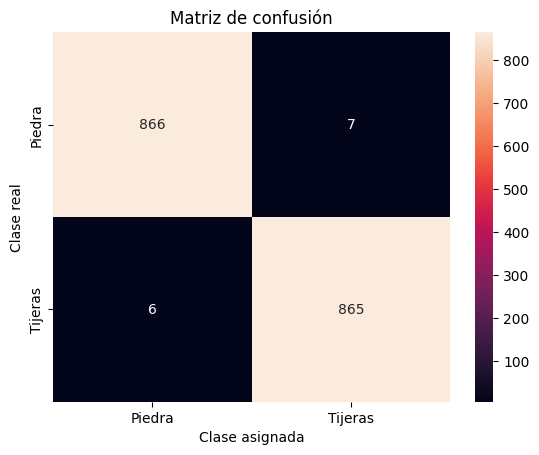

In [41]:
f,ax = plt.subplots()
labels = ["Piedra", "Tijeras"]
matriz_conf = confusion_matrix(y_testR,y_hat)
sns.heatmap(matriz_conf, annot=True, ax=ax, fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel("Clase asignada")
plt.ylabel("Clase real")
plt.title("Matriz de confusión")
plt.show()

Esta matriz muestra la cantidad de verdaderos Piedra y Tijeras que se han clasificado correctamente y los falsos Piedra y Tijeras que se han clasificado incorrectamente. Podemos ver que el modelo clasifica muy bien los datos, ya que solo se han clasificado incorrectamente 6 Piedra y 7 Tijeras de 1744.



Por otro lado podemos ver la precisión, recall y f1-score para cada clase:

In [42]:
print(classification_report(y_testR, y_hat))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       873
           1       0.99      0.99      0.99       871

    accuracy                           0.99      1744
   macro avg       0.99      0.99      0.99      1744
weighted avg       0.99      0.99      0.99      1744



Aquí podemos ver información sobre la precisión, el recall y F1-score para cada clase y su media ponderada. En este caso, para ambas clases se obtiene una precisión del 99% lo que muestra que el modelo ha tenido una tasa muy baja de falsos Piedra y de falsos Tijeras. El recall también es de 99% lo que nos indica que el modelo ha sido capaz de recuperar la gran mayoría de '1' es decir, tijeras y por tanto ha tenido una tasa muy baja de falsos negativos. Por último, el F1-score es de 99% lo que nos indica que el modelo ha tenido un buen balance entre precisión y recall.

La media de estas metricas es, por tanto, del 99% lo que nos indica que el modelo entrenado con regresión logística ha tenido un buen rendimiento general.

# 6. Red neuronal multiclase <a class="anchor" id="Red-neuronal"></a> 

Vamos a desarrollar una red neuronal para clasificar los gestos. Exploraremos el proceso de construcción, entrenamiento y evaluación de una red neuronal multicapa. Para ello usaremos la librería Keras de Tensor Flow.

En este caso ya usaremos los cuatro gestos para entrenar el modelo cuyo objetivo es clasificarlo en uno de estos, por lo que usaremos el dataset de clasificación. 

Se trata de un problema de clasificación multiclase, por lo que usaremos:
- **Función de activación softmax** en la capa de salida. Esta función es una generalización de la función sigmoide para más de dos clases la cual devuelve un vector de probabilidades de que la entrada pertenezca a cada una de las clases (una distribución de probabilidad). 
- **Optimizador Adam**, el cual utiliza una tasa de aprendizaje adaptativa para cada parámetro en lugar de una global y que, además, es una buena opción por su eficiencia computacional y su capacidad para manejar problemas con muchos datos y parámetros. 
- La función de coste que usaremos será la **entropía cruzada categórica**, la cual es la más utilizada para problemas de clasificación multiclase.
- Por último, en las capas ocultas usaremos la función de **activación ReLU**, la cual es la más utilizada en redes neuronales ya que es muy eficiente computacionalmente.

Los datos de entrada son los valores de los sensores y la salida es un vector de 4 posiciones con la probabilidad de que la entrada pertenezca a cada una de las clases.

Estos datos están ya normalizados y divididos en entrenamiento, validación y test. Recordemos qué datos tenemos:

In [43]:
X_train.shape, X_val.shape, X_test.shape

((7006, 64), (2336, 64), (2336, 64))

En total tenemos 7006 datos de entrenamiento, 2336 de validación y 2336 de test. Además son 64 columnas, es decir, la cantidad de datos de entrenamiento es bastante alta, por lo que usaremos un modelo complejo con regularización.

Modelo con 150 unidades en la primera capa, 50 en la segunda y 4 en la de salida:

## Adaptación

Al igual que hicimos en la regresión logística, vamos a mapear los datos a un espacio de mayor dimensión ya que esto ha dado un buen resultado en la regresión y al final cada neurona de una red neuronal aplica el mismo método. Para ello usaremos la función PolynomialFeatures de sklearn:

In [44]:
XX_train = map_features(X_train, degree)
XX_val = map_features(X_val, degree)
XX_test = map_features(X_test, degree)

In [45]:
XX_train.shape, XX_val.shape, XX_test.shape

((7006, 2144), (2336, 2144), (2336, 2144))

## Ajuste

Los hiperparámetros que vamos a ajustar son:

- **Tasa de aprendizaje** que es la tasa de aprendizaje del optimizador Adam
- **Número de neuronas** en la capa oculta
- **Número de iteraciones** que es el número de veces que se entrena el modelo

La tasa de aprendizaje es importante ya que si es demasiado baja, el modelo puede tardar mucho en aprender y si es demasiado alta, el modelo puede no converger. En este caso probaremos con valores entre 0.0.001 y 1.

El número de neuronas puede afectar a la precisión ya que si es demasiado bajo, el modelo no tendrá suficiente capacidad para aprender y si es demasiado alto, el modelo puede sobreajustarse a los datos de entrenamiento. En este caso probaremos con valores entre 10 y 150.

Por último, el número de iteraciones, si es demasiado bajo el modelo no tendrá tiempo de aprender lo suficiente y si es demasiado alto, como en el caso de las neuronas, el modelo puede sobreajustarse a los datos de entrenamiento. Probaremos con valores entre 20 y 100.

In [46]:
from scikeras.wrappers import KerasClassifier
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from bayes_opt import BayesianOptimization

In [71]:
def nn_cl_bo(neurons, learning_rate,  batch_size, epochs, layers, lmda):
    neurons = round(neurons)
    batch_size = round(batch_size)
    epochs = round(epochs)
    layers = round(layers)
    
    def nn_cl_fun():
        nn = Sequential()
        nn.add(Dense(neurons, input_dim=XX_train.shape[1], activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lmda)))
        for i in range(layers):
            nn.add(Dense(neurons, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lmda)))
        nn.add(Dense(4, activation='softmax'))
        nn.compile(loss='SparseCategoricalCrossentropy', optimizer=Adam(learning_rate= learning_rate), metrics=['accuracy'])
        return nn
    
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
    nn = KerasClassifier(model=nn_cl_fun, epochs=epochs, batch_size=batch_size, verbose=0, random_state=RANDOM_STATE)
    
    nn.fit(XX_train, y_train, validation_data = (XX_val, y_val),callbacks=[es], batch_size=batch_size, epochs=epochs)
    return nn.score(XX_test, y_test)

In [72]:
params_nn ={
    'neurons': (50, 150),
    'learning_rate':(0.001, 0.1),
    'batch_size':(128, 3000),
    'epochs':(20, 150),
    'layers' : (1, 3),
    'lmda' : (0.001, 0.1)
}

In [73]:
nn_bo = BayesianOptimization(nn_cl_bo, params_nn, random_state=RANDOM_STATE)
nn_bo.maximize(init_points=25)

|   iter    |  target   | batch_... |  epochs   |  layers   | learni... |   lmda    |  neurons  |
-------------------------------------------------------------------------------------------------
| 1         | 0.875     | 1.204e+03 | 143.6     | 2.464     | 0.06027   | 0.01645   | 65.6      |
| 2         | 0.8767    | 294.8     | 132.6     | 2.202     | 0.0711    | 0.003038  | 147.0     |
| 3         | 0.9148    | 2.519e+03 | 47.6      | 1.364     | 0.01916   | 0.03112   | 102.5     |
| 4         | 0.893     | 1.369e+03 | 57.86     | 2.224     | 0.01481   | 0.02992   | 86.64     |
| 5         | 0.8917    | 1.438e+03 | 122.1     | 1.399     | 0.05191   | 0.05965   | 54.65     |
| 6         | 0.8634    | 1.873e+03 | 42.17     | 1.13      | 0.09494   | 0.0966    | 130.8     |
| 7         | 0.8767    | 1.003e+03 | 32.7      | 2.368     | 0.04458   | 0.01308   | 99.52     |
| 8         | 0.7997    | 226.8     | 138.2     | 1.518     | 0.06659   | 0.03186   | 102.0     |
| 9         | 0.6858

De esta tabla podemos observar en el último morado los parámetros para el mejor target que, en nuestro caso, es la precisión de test. 

Los mejores parámetros son:

In [74]:
params_nn_ = nn_bo.max['params']
params_nn_

{'batch_size': 881.1189642268528,
 'epochs': 98.79643151077138,
 'layers': 1.0,
 'learning_rate': 0.001,
 'lmda': 0.001,
 'neurons': 150.0}

Nos guardaremos estos parámetros para entrenar el modelo final.

In [75]:
best_batch_size = round(params_nn_['batch_size'])
best_epochs = round(params_nn_['epochs'])
best_learning_rate = params_nn_['learning_rate']
best_neurons = round(params_nn_['neurons'])
best_layers = round(params_nn_['layers'])
best_lmda = params_nn_['lmda']

## Red neuronal con mejor resultado:

In [76]:
modelo = Sequential()

modelo.add(Dense(best_neurons, input_dim=XX_train.shape[1], activation='relu', kernel_regularizer=tf.keras.regularizers.l2(best_lmda)))
for i in range(best_layers):
    modelo.add(Dense(best_neurons, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(best_lmda)))
modelo.add(Dense(4, activation='softmax'))
modelo.add(Dense(4, activation='softmax'))

modelo.compile(loss='SparseCategoricalCrossentropy', optimizer=Adam(best_learning_rate), metrics=['accuracy'])

es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)

history = modelo.fit(XX_train, y_train, validation_data=(XX_val, y_val), epochs=best_epochs, batch_size=best_batch_size, verbose=0, callbacks=[es])

Esta es la precisión de entrenamiento, test y evaluación para cada iteración:

In [77]:
score = modelo.evaluate(XX_test, y_test, verbose=0)
print('Precisión en el conjunto de test:', score[1]*100 ,'%')

Precisión en el conjunto de test: 91.13869667053223 %


In [78]:
score = modelo.evaluate(XX_train, y_train, verbose=0)
print('Precisión en el conjunto de entrenamiento:', score[1]*100 ,'%')

Precisión en el conjunto de entrenamiento: 99.70025420188904 %


In [79]:
score = modelo.evaluate(XX_val, y_val, verbose=0)
print('Precisión en el conjunto de validación:', score[1]*100 ,'%')

Precisión en el conjunto de validación: 92.25171208381653 %


## Estudio de la precisión:


Primero veremos las medidas de calidad respecto a los datos de entrenamiento (métricas de entrenamiento):
- Precision: fracción de predicciones correctas que el modelo ha hecho
- Recall: fracción de ejemplos positivos que el modelo ha predicho correctamente
- F1-score: medida de la precisión y exhaustividad del modelo

In [ ]:
cr = classification_report(y_test, y_hat)
print (cr)

TODO conclusiones

Podemos ver también cómo de bien clasifica cada clase con la matriz de confusión:

In [ ]:
f,ax = plt.subplots(figsize=(15, 15))
matriz_conf = confusion_matrix(y_test,y_hat)
sns.set(font_scale=1.4)
sns.heatmap(matriz_conf, annot=True, ax=ax)
plt.xlabel("Clase asignada")
plt.ylabel("Clase real")
plt.title("Matriz de confusión")
plt.show()

# 10. Bibiliografía <a class="anchor" id="Bibliografía"></a>

- Ng, A. “C1_W3 classification + regularization.” Stanford. Disponible en el Campus Virtual.
- Ng, A. "C2_W1 NN." Stanford. Disponible en el Campus Virtual.
- Ng, A. "C2_W2 NN training + multiclass." Stanford. Disponible en el Campus Virtual.
- Ng, A. "C2_W3 evaluation." Stanford. Disponible en el Campus Virtual.

- Amat Rodrigo, J. (2020) Regresión Lineal con python, Regresión lineal con python. Cienciadedatos.net. Disponible en: https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html (Visitado: 28 de abril, 2023). 

- Amat Rodrigo, J. (2020) Regresión Lineal con python, Regresión lineal con python. Cienciadedatos.net. Disponible en: https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html (Visitado: 28 de abril, 2023). 

- Redacción KeepCoding (2022) Función Softmax en tensorflow, Función softmax en TensorFlow . KeepCoding Bootcamps. Disponible en: https://keepcoding.io/blog/funcion-softmax-tensorflow/#Funcion_softmax_en_TensorFlow (Visitado: 1 de mayo, 2023). 

- Brownlee, J. (2021) Gentle introduction to the adam optimization algorithm for deep learning, MachineLearningMastery.com. machinelearningmastery.com. Disponible en: https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/ (Visitado: 1 de mayo, 2023). 

- Rendyk (2022) Tuning the hyperparameters and layers of neural network deep learning, Analytics Vidhya. Data Science Blogathon. Disponible en: https://www.analyticsvidhya.com/blog/2021/05/tuning-the-hyperparameters-and-layers-of-neural-network-deep-learning/ (Visitado: 7 de mayo, 2023). 

- Natsume, Y. (2022) Bayesian optimization with python, Medium. Towards Data Science. Disponible en: https://towardsdatascience.com/bayesian-optimization-with-python-85c66df711ec (Visitado: 7 de mayo, 2023). 

- Prácticas 4, 6, 7 de la asignatura de Aprendizaje Automático.

### Figuras:

- Figura 1:
    Ng, A. Machine Learning , Machine learning. Disponible en: http://openclassroom.stanford.edu/MainFolder/DocumentPage.php?course=MachineLearning&amp;doc=exercises%2Fex5%2Fex5.html (Visitado: 1 de mayo, 2023). 

- Figuras 2 y 3:
    Ng, A. “C1_W3 classification + regularization.” Stanford. 